# Data Prepare Friends

This is Preparation of classification Bert modelling

In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
PATH_DATA = '../../data/'

## Data Import

In [3]:
df_dlg = pd.read_csv(PATH_DATA+'friends_all_dialogue_semi_cln.csv')

FileNotFoundError: ignored

## Creating Label

In [ ]:
# char_dlg_cnt = df_dlg.character.value_counts()
# char_dlg_cnt[char_dlg_cnt>100].index.tolist()
char = ['rachel', 'ross', 'monica', 'chandler', 'joey', 'phoebe']
char_id = [1,2,3,4,5,6]
char2id = dict(zip(char+['other'],char_id+[0]))

In [ ]:
df_dlg['label_str'] = df_dlg.character.apply(lambda x : x if x in char else 'other')
df_dlg['label'] = df_dlg.label_str.apply(lambda x : char2id[x])

In [ ]:
df_dlg

,eps,dialogue_ids,scenes_places,character,dialogue,dialogue2,dialogue3,label_str,label
0,0101,0,[central perk],monica,there's nothing to tell! he's just some guy ...,there's nothing to tell! he's just some guy ...,there's nothing to tell he's just some guy i w...,monica,3
1,0101,1,[central perk],joey,"c'mon, you're going out with the guy! there'...","c'mon, you're going out with the guy! there'...",c'mon you're going out with the guy there's go...,joey,5
2,0101,2,[central perk],chandler,"all right joey, be nice. so does he have a...","all right joey, be nice. so does he have a...",all right joey be nice so does he have a hump ...,chandler,4
3,0101,3,[central perk],phoebe,"wait, does he eat chalk? (they all stare, be...","wait, does he eat chalk?",wait does he eat chalk,phoebe,6
4,0101,4,[central perk],phoebe,"just, 'cause, i don't want her to go through...","just, 'cause, i don't want her to go through...",just 'cause i don't want her to go through wha...,phoebe,6
...,...,...,...,...,...,...,...,...,...
61485,1017-1018,580,[monica and chandler's apartment],chandler,"oh, it's gonna be okay. (chandler hugs her. m...","oh, it's gonna be okay.",oh it's gonna be okay,chandler,4
61486,1017-1018,581,[monica and chandler's apartment],rachel,(crying) do you guys have to go to the new ho...,do you guys have to go to the new house righ...,do you guys have to go to the new house right ...,rachel,1
61487,1017-1018,582,[monica and chandler's apartment],monica,we got some time.,we got some time.,we got some time,monica,3
61488,1017-1018,583,[monica and chandler's apartment],rachel,"okay, should we get some coffee?","okay, should we get some coffee?",okay should we get some coffee,rachel,1


## Sentence Length

In [ ]:
df_dlg.dialogue2 = df_dlg.dialogue2.str.strip()
df_dlg['len_dialogue2'] = df_dlg.dialogue2.str.split().apply(lambda x : len(x))

In [ ]:
XX=df_dlg['len_dialogue2']
XX.describe()

count    61490.000000
mean        10.310229
std         10.695072
min          0.000000
25%          3.000000
50%          7.000000
75%         14.000000
max        238.000000
Name: len_dialogue2, dtype: float64

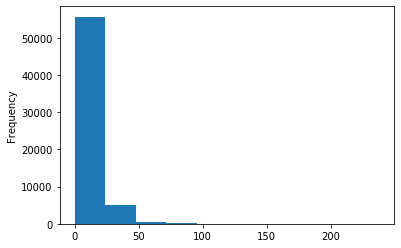

In [ ]:
XX.plot(kind='hist')

In [ ]:
np.percentile(XX,20)

3.0

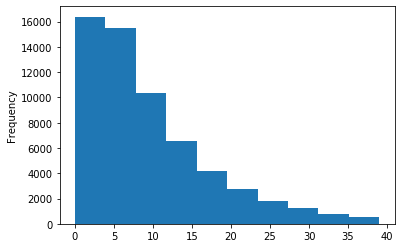

In [ ]:
XX[XX<40].plot(kind='hist')

In [ ]:
# df_dlg[df_dlg['len_dialogue2']>50]

In [ ]:
df_dlg2 = df_dlg[(df_dlg['len_dialogue2']>0)&(df_dlg['len_dialogue2']<30)][['dialogue2','label','eps']]
df_dlg2.columns = ['text','label','episode']
df_dlg2['ids'] = [i for i in range(len(df_dlg2))]

In [ ]:
df_dlg2['season']= df_dlg2['episode'].apply(lambda x : x[:2])
df_dlg2.season.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10'],
      dtype=object)

In [ ]:
df_dlg2.head()

,text,label,episode,ids,season
0,there's nothing to tell! he's just some guy i ...,3,0101,0,01
1,"c'mon, you're going out with the guy! there's ...",5,0101,1,01
2,"all right joey, be nice. so does he have a hu...",4,0101,2,01
3,"wait, does he eat chalk?",6,0101,3,01
4,"just, 'cause, i don't want her to go through w...",6,0101,4,01


## Spliting

In [ ]:
df_dlg2_seen=df_dlg2[df_dlg2['season'].isin(['01', '02', '03', '04', '05', '06', '07', '08'])]
train_ids = df_dlg2_seen.sample(int(len(df_dlg2_seen)*0.75),random_state = 167).ids.tolist()
df_dlg2_seen['is_train'] = df_dlg2_seen.ids.isin(train_ids)
df_dlg2_unseen=df_dlg2[df_dlg2['season'].isin(['09', '10'])]

/Users/alamhanz/anaconda/envs/py37_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_dlg2_seen.head()

,text,label,episode,ids,season,is_train
0,there's nothing to tell! he's just some guy i ...,3,0101,0,01,True
1,"c'mon, you're going out with the guy! there's ...",5,0101,1,01,False
2,"all right joey, be nice. so does he have a hu...",4,0101,2,01,True
3,"wait, does he eat chalk?",6,0101,3,01,False
4,"just, 'cause, i don't want her to go through w...",6,0101,4,01,True


In [ ]:
df_dlg2_unseen.head()

,text,label,episode,ids,season
49643,joey.,1,0901,46831,09
49644,oh my god. okay.,1,0901,46832,09
49645,so uh...i guess we should...make it official huh?,1,0901,46833,09
49646,uh... look rach... hey ross is here! hey look!...,5,0901,46834,09
49647,hey joey. hey you.,2,0901,46835,09


## Saving

In [ ]:
df_dlg2_seen.to_csv('../../data/friends_seen_season.csv',index=False)
df_dlg2_unseen.to_csv('../../data/friends_unseen_season.csv',index=False)